In [1]:
%matplotlib inline
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import csv

In [2]:
raw_data = pd.read_csv('data/listings.csv')
print "Total %s objects" % raw_data['id'].count()

Total 48852 objects


C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (43,61,62,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print "Total %s objects" % raw_data.count()

Total id                                  48852
listing_url                         48852
scrape_id                           48852
last_scraped                        48852
name                                48824
summary                             47464
space                               33201
description                         48817
experiences_offered                 48852
neighborhood_overview               28841
notes                               18385
transit                             30391
access                              28476
interaction                         27346
house_rules                         29259
thumbnail_url                           0
medium_url                              0
picture_url                         48852
xl_picture_url                          0
host_id                             48852
host_url                            48852
host_name                           48746
host_since                          48746
host_location               

In [4]:
# import columns we want to extract
header = ['price',
          'host_neighbourhood',
          'host_identity_verified',
          'neighbourhood',
          'city',
          'zipcode',
          'property_type',
          'room_type',
          'accommodates',
          'bathrooms',
          'bedrooms',
          'beds',
          'bed_type',
          'square_feet',
          'security_deposit',
          'cleaning_fee',
          'guests_included',
          'extra_people',
          'availability_30',
          'availability_60',
          'availability_90',
          'availability_365',
          'number_of_reviews',
          'review_scores_rating',
          'review_scores_accuracy',
          'review_scores_cleanliness',
          'review_scores_checkin',
          'review_scores_communication',
          'review_scores_location',
          'review_scores_value',
          'cancellation_policy']

In [5]:
raw_data.to_csv('data/airbnb_data_analysis.csv', columns = header, index=False)
data_features = pd.read_csv('data/airbnb_data_analysis.csv')
print "Total %s objects" % data_features.count()

Total price                          48852
host_neighbourhood             42031
host_identity_verified         48746
neighbourhood                  48842
city                           48791
zipcode                        48172
property_type                  48852
room_type                      48852
accommodates                   48852
bathrooms                      48713
bedrooms                       48796
beds                           48783
bed_type                       48852
square_feet                      533
security_deposit               28101
cleaning_fee                   35867
guests_included                48852
extra_people                   48852
availability_30                48852
availability_60                48852
availability_90                48852
availability_365               48852
number_of_reviews              48852
review_scores_rating           36946
review_scores_accuracy         36870
review_scores_cleanliness      36893
review_scores_checkin          3

In [6]:
data_features['price'].count()

48852

In [7]:
# replacing NaN values with 0
data_features.fillna(0, inplace=True)

prices = []

# the values are stored as '$7,000' instead of 7000.
# # data cleaning to make the values into floats
for i in range(len(data_features['price'])):
    price = data_features['price'][i]
    price = re.sub('[,$]', '', price)
    prices.append(float(price))
print prices[0:3] , len(prices)

# # replacing the current column into a new one for future use
data_features['price'] = prices

[59.0, 39.0, 225.0] 48852


In [8]:
# excluding listings with "0" for price, bedrooms, etc
data_features = data_features[data_features.city != 0]
data_features = data_features[data_features.price > 0]
data_features = data_features[data_features.bedrooms > 0]
data_features = data_features[data_features.beds > 0]
data_features = data_features[data_features.review_scores_rating > 0]
data_features = data_features[data_features.accommodates > 0]
data_features = data_features[data_features.bathrooms > 0]

# first 5 of the listing file
data_features[0:5]

,price,host_neighbourhood,host_identity_verified,neighbourhood,city,zipcode,property_type,room_type,accommodates,bathrooms,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy
0,59.0,Harlem,t,Harlem,New York,10026,Apartment,Private room,2,1.0,...,316,164,92.0,9.0,9.0,10.0,9.0,9.0,9.0,strict
1,39.0,Gravesend,t,Kensington,Brooklyn,11218,Apartment,Private room,4,1.0,...,365,7,97.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate
3,70.0,East Williamsburg,t,Williamsburg,Brooklyn,11206,Apartment,Private room,2,1.0,...,279,27,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict
5,89.0,Clinton Hill,t,Clinton Hill,Brooklyn,11238,Other,Entire home/apt,3,1.0,...,126,181,90.0,9.0,9.0,10.0,10.0,9.0,9.0,moderate
6,150.0,Hell's Kitchen,t,Hell's Kitchen,New York,10036,Apartment,Entire home/apt,3,1.0,...,17,26,88.0,9.0,9.0,10.0,10.0,10.0,9.0,strict


# Property type distribution

In [9]:
# using Counter to analyze frequency of each property type
nh = Counter(data_features['property_type'])
nh

Counter({'Aparthotel': 4,
         'Apartment': 27502,
         'Bed and breakfast': 87,
         'Boat': 3,
         'Boutique hotel': 29,
         'Bungalow': 16,
         'Cabin': 1,
         'Camper/RV': 2,
         'Casa particular (Cuba)': 1,
         'Castle': 1,
         'Cave': 2,
         'Chalet': 1,
         'Condominium': 400,
         'Cottage': 1,
         'Dorm': 17,
         'Earth house': 3,
         'Guest suite': 93,
         'Guesthouse': 35,
         'Hostel': 19,
         'Hotel': 6,
         'House': 2900,
         'Hut': 2,
         'In-law': 9,
         'Island': 1,
         'Loft': 792,
         'Other': 157,
         'Serviced apartment': 113,
         'Tent': 1,
         'Timeshare': 19,
         'Tiny house': 1,
         'Townhouse': 902,
         'Treehouse': 1,
         'Vacation home': 9,
         'Villa': 14,
         'Yurt': 1})

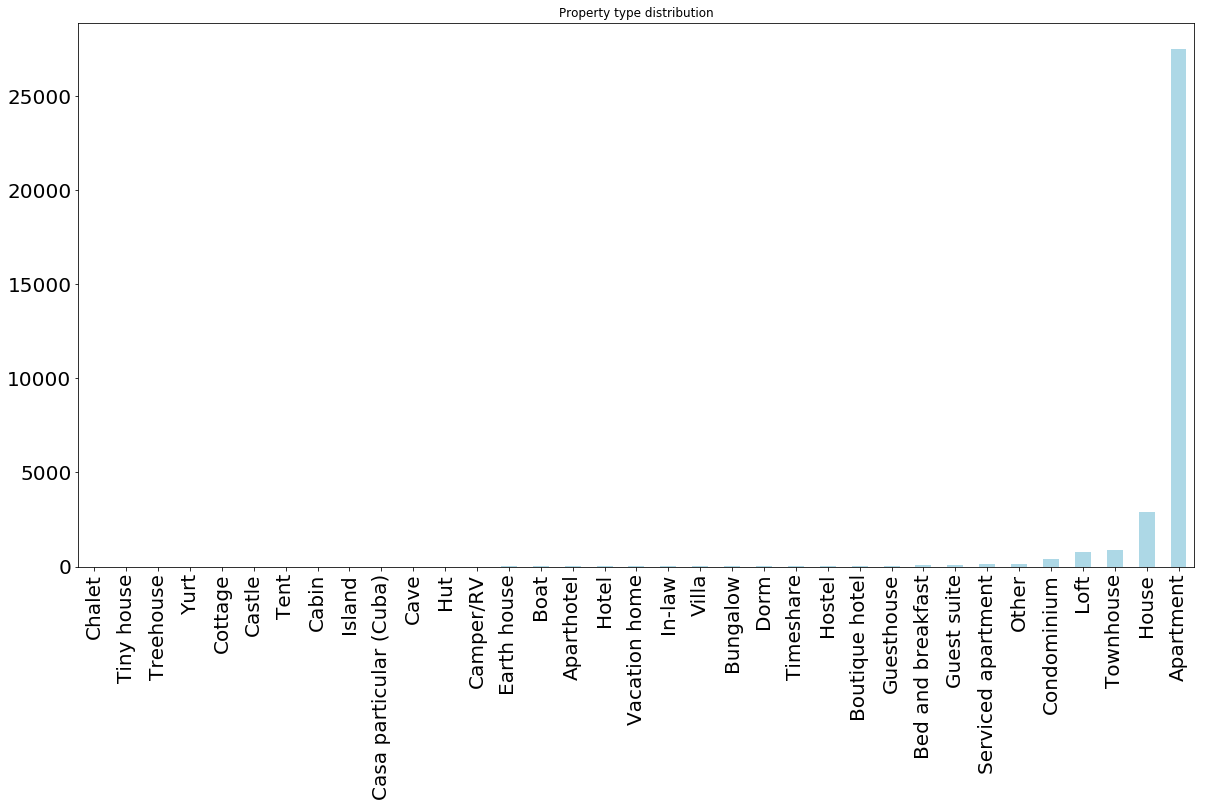

In [10]:
nh_df = pd.DataFrame.from_dict(nh, orient='index').sort_values(by=0)
nh_df.columns = ['property_type']
nh_df.plot.bar(y= 'property_type', 
                 color = 'LightBlue',
                 fontsize = 20,
                 legend = False,
                 figsize= (20, 10),
                 title = "Property type distribution")

# distribution of room types

In [11]:
# using Counter to analyze frequency of room types
r = data_features.room_type
nh = Counter(r)
nh

Counter({'Entire home/apt': 15849, 'Private room': 16485, 'Shared room': 811})

In [12]:
nh_df = pd.DataFrame.from_dict(nh, orient='index').sort_values(by=0)
nh_df.columns =['room_type']

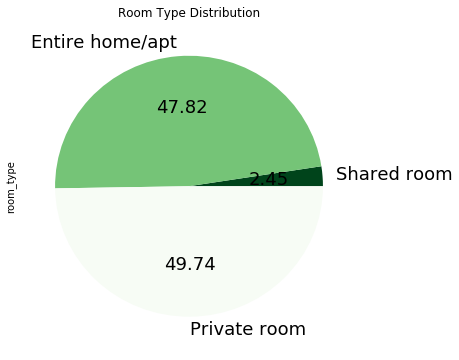

In [13]:
nh_df.plot.pie(y = 'room_type', 
                 colormap = 'Greens_r', 
                 figsize=(6,6), 
                 fontsize = 18, autopct = '%.2f',
                 legend = False,
                 title = 'Room Type Distribution')

# Frequency of number of bedrooms

In [14]:
nh = Counter(data_features['bedrooms'])
nh

Counter({1.0: 26322,
         2.0: 4860,
         3.0: 1467,
         4.0: 374,
         5.0: 80,
         6.0: 21,
         7.0: 13,
         8.0: 3,
         9.0: 2,
         10.0: 1,
         11.0: 1,
         14.0: 1})

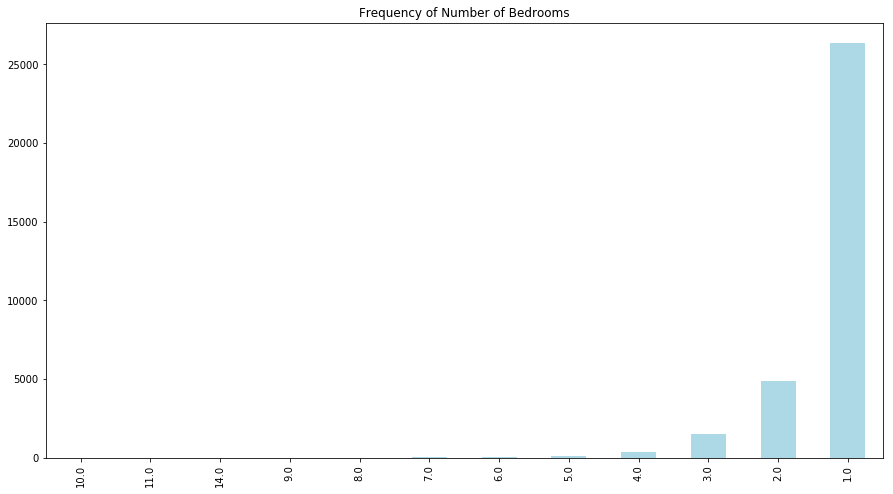

In [15]:
nh_df = pd.DataFrame.from_dict(nh, orient='index').sort_values(by=0)
nh_df.plot(kind='bar', 
           color = 'LightBlue', 
           figsize =(15,8), 
           title = 'Frequency of Number of Bedrooms', 
           legend = False)

# distribution of review score ratings

In [16]:
# using Counter to analyze frequency of each listing based on neighborhood
nh = Counter(data_features['review_scores_rating'])
nh

Counter({20.0: 81,
         30.0: 3,
         40.0: 81,
         43.0: 1,
         45.0: 1,
         47.0: 3,
         50.0: 25,
         51.0: 1,
         53.0: 5,
         55.0: 2,
         56.0: 1,
         57.0: 5,
         60.0: 309,
         62.0: 1,
         63.0: 4,
         64.0: 12,
         65.0: 13,
         67.0: 40,
         68.0: 23,
         69.0: 10,
         70.0: 122,
         71.0: 13,
         72.0: 19,
         73.0: 102,
         74.0: 30,
         75.0: 64,
         76.0: 51,
         77.0: 52,
         78.0: 52,
         79.0: 42,
         80.0: 1569,
         81.0: 63,
         82.0: 141,
         83.0: 258,
         84.0: 271,
         85.0: 364,
         86.0: 336,
         87.0: 707,
         88.0: 611,
         89.0: 683,
         90.0: 1879,
         91.0: 951,
         92.0: 1193,
         93.0: 2141,
         94.0: 1532,
         95.0: 1998,
         96.0: 2161,
         97.0: 2062,
         98.0: 2060,
         99.0: 1074,
         100.0: 9923})

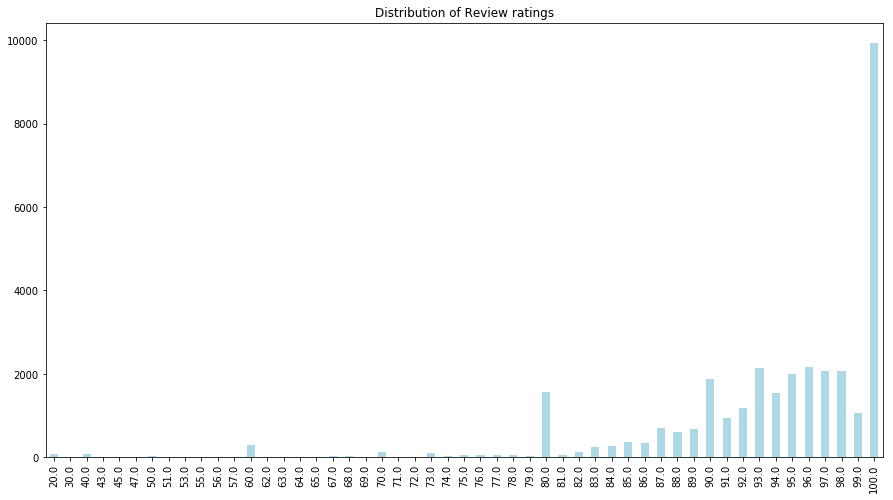

In [17]:
nh_df = pd.DataFrame.from_dict(nh, orient='index')
nh_df.plot(kind='bar', 
           color = 'LightBlue', 
           figsize =(15,8), 
           title = 'Distribution of Review ratings', 
           legend = False)

In [18]:
average_price = sum(data_features.price) / float(len(data_features.price))
average_price

139.09820485744456

# average price per city

In [19]:
# using Counter to analyze frequency of city
nh = Counter(data_features['city'])
nh

Counter({' Brooklyn': 2,
         ' Crown Heights,NY': 1,
         ' New York': 1,
         ' New York ': 1,
         '11220': 1,
         '8425 Elmhurst avenue ': 1,
         'ASTORIA': 3,
         'ASTORIA/LIC': 1,
         'Arverne': 6,
         'Arverne ': 4,
         'Astoria': 140,
         'Astoria ': 40,
         'Astoria - New York': 1,
         'Astoria New York': 2,
         'Astoria Queens': 1,
         'Astoria, New York': 1,
         'Astoria, New York ': 1,
         'Astoria, Queens': 4,
         'Astoria, Queens ': 1,
         'Astoria,New York ': 1,
         'Astoria/Queens': 1,
         'BK': 1,
         'BROOKLYN': 2,
         'BROOKLYN ': 1,
         'Bayonne': 1,
         'Bayside': 3,
         'Bayside queens ': 1,
         'Bayside, Queens': 1,
         'Bedstuy ': 1,
         'Bellerose': 1,
         'Bk': 1,
         'Bklyn NY': 1,
         'Briarwood': 2,
         'Briarwood ': 2,
         'Bronx': 531,
         'Bronx ': 34,
         'Bronx NY ': 1,
         

In [20]:
# extracting the names
city_names = list(nh.keys())

# 2 column table of neighborhood names and prices
nh_prices = data_features[['neighbourhood', 'price']]
nh_prices.columns = ['city', 'price']

# we pick out the rows which have neighborhood names and city_names in common
nh_prices = nh_prices[nh_prices['city'].isin(city_names)]

# group by neighbourhood and then aggreate the prices based on mean
nh_prices_group = nh_prices.groupby('city')
nh_prices = nh_prices_group['price'].agg(np.mean)

# turn dictionary's keys and values into a table for easy read
nh_prices = nh_prices.reset_index()
nh_prices

,city,price
0,Astoria,112.019095
1,Bayside,96.196078
2,Brooklyn,94.235294
3,Brooklyn Heights,183.245283
4,Bushwick,84.605505
5,City Island,89.000000
6,College Point,106.750000
7,Corona,60.763889
8,East Elmhurst,67.829268
9,Elmhurst,74.569343


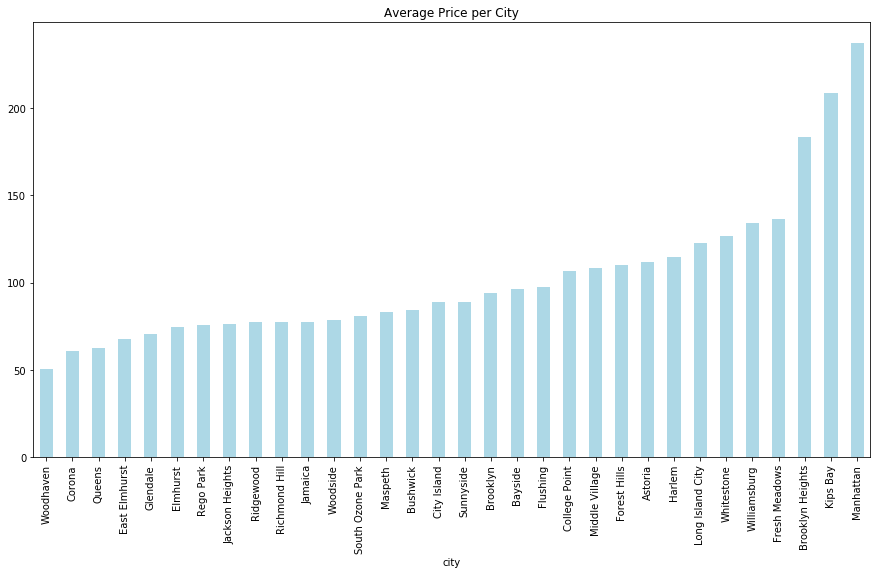

In [21]:
p = nh_prices.sort_values(by = 'price')
p.plot(x = "city",
       y = "price",
       kind='bar', 
       color = 'LightBlue', 
       figsize =(15,8), 
       title = 'Average Price per City', 
       legend = False)

In [22]:
prop_room = data_features[['property_type', 'room_type', 'price']]

# first ten of the table
prop_room[0:10]

,property_type,room_type,price
0,Apartment,Private room,59.0
1,Apartment,Private room,39.0
3,Apartment,Private room,70.0
5,Other,Entire home/apt,89.0
6,Apartment,Entire home/apt,150.0
7,Apartment,Entire home/apt,150.0
9,Apartment,Entire home/apt,253.0
10,Apartment,Entire home/apt,129.0
11,Apartment,Private room,79.0
12,Apartment,Private room,79.0


# Grouping by property and room type, and then aggregating them using mean of the price

In [23]:
prop_room_group = prop_room.groupby(['property_type', 'room_type']).mean()

# resetting the index in order to turn the lists into a readable table
p = prop_room_group.reset_index()

# pivoting the table based on the 3 factors, in order.
p = p.pivot('property_type', 'room_type', 'price')

# replacing the NaN values with 0
p.fillna(0.00, inplace=True)

p

room_type,Entire home/apt,Private room,Shared room
property_type,,,
Aparthotel,0.000000,131.500000,0.000000
Apartment,192.933338,81.011906,60.241791
Bed and breakfast,286.545455,89.810811,35.000000
Boat,80.000000,600.000000,0.000000
Boutique hotel,185.000000,164.962963,0.000000
Bungalow,176.666667,77.285714,0.000000
Cabin,0.000000,80.000000,0.000000
Camper/RV,210.000000,50.000000,0.000000
Casa particular (Cuba),0.000000,44.000000,0.000000
